# REVIEW 3 - big data framework

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**As we are going to do in pyspark and findspark environment we are installing it.**

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 43.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=d989981ea441026b4063c01bd18f703da1d1b2ba6284efd12401200f507bbf4d
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!pip install findspark

In [ ]:
import os
import sys
import re
import random
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

sqlContext = SQLContext(sc)
# Base directory path

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
base = "/content/drive/MyDrive/user_artist_data_small1.txt"

In [ ]:
userArtistDataSchema = StructType([ \
    StructField("userID", LongType(), True), \
    StructField("artistID", LongType(), True), \
    StructField("playCount", IntegerType(), True)])

userArtistDF = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='false', delimiter=' ') \
    .load(base , schema = userArtistDataSchema) \
    .cache()

In [ ]:
userArtistDF.cache()
userArtistDF.show()

+-------+--------+---------+
| userID|artistID|playCount|
+-------+--------+---------+
|1059637| 1000010|      238|
|1059637| 1000049|        1|
|1059637| 1000056|        1|
|1059637| 1000062|       11|
|1059637| 1000094|        1|
|1059637| 1000112|      423|
|1059637| 1000113|        5|
|1059637| 1000114|        2|
|1059637| 1000123|        2|
|1059637| 1000130|    19129|
|1059637| 1000139|        4|
|1059637| 1000241|      188|
|1059637| 1000263|      180|
|1059637| 1000289|        2|
|1059637| 1000305|        1|
|1059637| 1000320|       21|
|1059637| 1000340|        1|
|1059637| 1000427|       20|
|1059637| 1000428|       12|
|1059637| 1000433|       10|
+-------+--------+---------+
only showing top 20 rows



In [ ]:
allusers = userArtistDF.count()
print("All rows in database: ", allusers )
uniqueUsers = userArtistDF.select('userID').distinct().count()
print("Total n. of distinct users: ", uniqueUsers)

All rows in database:  49981
Total n. of distinct users:  50


In [ ]:
uniqueArtists = userArtistDF.select('artistID').distinct().count()
print("Total n. of artists: ", uniqueArtists)

Total n. of artists:  30677


In [ ]:
MAX_VALUE = 2147483647
#showing the IDs which are invalid
userArtistDF[(userArtistDF.userID.cast("int") < 0)].show()
userArtistDF[(userArtistDF.userID.cast("int") > MAX_VALUE)].show()
# We don't see any invalid userID
userArtistDF.select("userID").describe().show()

+------+--------+---------+
|userID|artistID|playCount|
+------+--------+---------+
+------+--------+---------+

+------+--------+---------+
|userID|artistID|playCount|
+------+--------+---------+
+------+--------+---------+

+-------+-----------------+
|summary|           userID|
+-------+-----------------+
|  count|            49981|
|   mean|1328573.598287349|
| stddev|452997.5191808399|
|    min|          1000647|
|    max|          2288164|
+-------+-----------------+



In [ ]:
userActivity = userArtistDF.groupBy('userID').sum('playCount').collect()
print(userActivity[0:5])
len(userActivity)

[Row(userID=2010008, sum(playCount)=77724), Row(userID=2020513, sum(playCount)=165642), Row(userID=1055449, sum(playCount)=73484), Row(userID=1058890, sum(playCount)=98477), Row(userID=1041919, sum(playCount)=73029)]


50

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


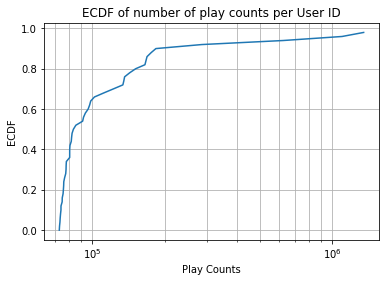

In [ ]:
pdf = pd.DataFrame(data=userActivity)
Y=np.sort( pdf[1] )
yvals=np.arange(len(Y))/float(len(Y))

print(np.arange(len(Y)))

plt.semilogx( Y, yvals )
plt.xlabel('Play Counts')
plt.ylabel('ECDF')
plt.grid(True,which="both",ls="-")
plt.title('ECDF of number of play counts per User ID')
plt.show()

In [ ]:
print ('Total =', Y.sum())
print ('Mean =', Y.mean())
print ('Min =', Y.min())
print ('Max =', Y.max())

Total = 7914123
Mean = 158282.46
Min = 72855
Max = 1348824


In [ ]:
#important percentiles (25%, median, 75%, tails such as >90%)
print('Percentile 25% :' + str(np.percentile(Y,25)))
print('Percentile 50% :' + str(np.percentile(Y,50)))
print('Percentile 75% :' + str(np.percentile(Y,75)))
print('Percentile 90% :' + str(np.percentile(Y,90)))
print('Percentile 95% :' + str(np.percentile(Y,95)))
print('Percentile 99% :' + str(np.percentile(Y,99)))

Percentile 25% :76217.5
Percentile 50% :82881.0
Percentile 75% :134957.5
Percentile 90% :176637.0
Percentile 95% :471767.99999999907
Percentile 99% :1225358.6999999995


In [ ]:
artistPopularity = userArtistDF.groupBy('artistID').sum('playCount').collect()
print(artistPopularity[0:5]) 
len(artistPopularity)

[Row(artistID=1001530, sum(playCount)=17962), Row(artistID=1002734, sum(playCount)=1156), Row(artistID=1191501, sum(playCount)=5), Row(artistID=5409, sum(playCount)=8095), Row(artistID=1184419, sum(playCount)=1)]


30677

[    0     1     2 ... 30674 30675 30676]


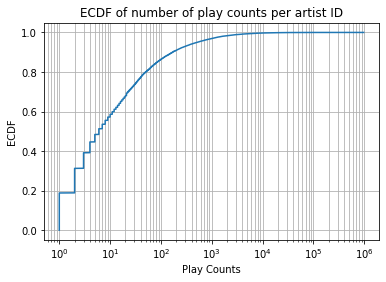

In [ ]:
pdf1 = pd.DataFrame(data=artistPopularity)
Y1=np.sort( pdf1[1] )
yvals1=np.arange(len(Y1))/float(len(Y1))
print(np.arange(len(Y1)))
plt.semilogx( Y1, yvals1 )
plt.xlabel('Play Counts')
plt.ylabel('ECDF')
plt.grid(True,which="both",ls="-")
plt.title('ECDF of number of play counts per artist ID')
plt.show()

In [ ]:
print ('Sum =', Y1.sum())
print ('Mean =', Y1.mean())
print ('Min =', Y1.min())
print ('Max =', Y1.max())
print ('Top 5 play counts:', Y1[len(Y1)-5:len(Y1)])
print ('Sum top 5 artist play counts:', Y1[len(Y1)-5:len(Y1)].sum())
print ('Percentage of top 5 artist play counts:', Y1[len(Y1)-5:len(Y1)].sum()/Y1.sum())
print ('P(playCount<=10) =', len(Y1[Y1<=10])/len(Y1))
print ('P(playCount<=1000) =', len(Y1[Y1<=1000])/len(Y1))

Sum = 7914123
Mean = 257.9822994425791
Min = 1
Max = 972991
Top 5 play counts: [ 71994  97804 319323 881413 972991]
Sum top 5 artist play counts: 2343525
Percentage of top 5 artist play counts: 0.2961193552336753
P(playCount<=10) = 0.5857482804707109
P(playCount<=1000) = 0.9697819213091241


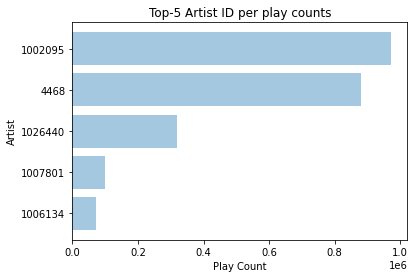

In [ ]:
sortedArtist = sorted(artistPopularity, key = lambda x: -x[1])[:5]

artistID = [w[0] for w in sortedArtist]

y_pos = range(len(sortedArtist))
frequency = [w[1] for w in sortedArtist]

plt.barh(y_pos, frequency[::-1], align='center', alpha=0.4)
plt.yticks(y_pos, artistID[::-1])
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top-5 Artist ID per play counts')
plt.show()

In [ ]:
base="/content/drive/MyDrive/artist_data_small1.txt"

In [ ]:
customSchemaArtist = StructType([ \
    StructField("artistID", LongType(), True), \
    StructField("name", StringType(), True)])

artistDF = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='false', delimiter='\t', mode='DROPMALFORMED') \
    .load(base , schema = customSchemaArtist) \
    .cache()
artistDF.show(5)

+--------+--------------------+
|artistID|                name|
+--------+--------------------+
| 1240105|        André Visior|
| 1240113|           riow arai|
| 1240132|Outkast & Rage Ag...|
| 6776115|            小松正夫|
| 1030848|      Raver's Nature|
+--------+--------------------+
only showing top 5 rows



In [ ]:
artistDF[locate("Aerosmith", artistDF.name) > 0].show(10000, False)
artistDF[artistDF.artistID==1027859].show()
artistDF[artistDF.artistID==1252408].show()

+--------+---------+
|artistID|name     |
+--------+---------+
|1000010 |Aerosmith|
+--------+---------+

+--------+--------------------+
|artistID|                name|
+--------+--------------------+
| 1027859|Trevor Jones and ...|
+--------+--------------------+

+--------+--------------------+
|artistID|                name|
+--------+--------------------+
| 1252408|Trevor Jones & Ra...|
+--------+--------------------+



In [ ]:
base="/content/drive/MyDrive/artist_alias_small1.txt"

In [ ]:
customSchemaArtistAlias = StructType([ \
    StructField("mispelledID", LongType(), True), \
    StructField("standardID", LongType(), True)])

artistAliasDF = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='false', delimiter='\t', mode='DROPMALFORMED') \
    .load(base , schema = customSchemaArtistAlias) \
    .cache()

artistAliasDF.show(5)

+-----------+----------+
|mispelledID|standardID|
+-----------+----------+
|    1027859|   1252408|
|    1017615|       668|
|    6745885|   1268522|
|    1018110|   1018110|
|    1014609|   1014609|
+-----------+----------+
only showing top 5 rows



In [ ]:
artistAliasDF[artistAliasDF.mispelledID == "1027859" ].show()
artistAliasDF[artistAliasDF.mispelledID == "1252408" ].show()


+-----------+----------+
|mispelledID|standardID|
+-----------+----------+
|    1027859|   1252408|
|    1027859|   1252408|
+-----------+----------+

+-----------+----------+
|mispelledID|standardID|
+-----------+----------+
+-----------+----------+



In [ ]:
artistAlias = artistAliasDF.rdd.map(lambda row: (row.mispelledID,row.standardID)).collectAsMap()
len(artistAlias)

587

In [ ]:
from time import time

bArtistAlias = sc.broadcast(artistAlias)

def replaceMispelledIDs(fields):
    finalID = bArtistAlias.value.get(fields[1] ,fields[1])
    return (fields[0], finalID, fields[2])

t0 = time()

newUserArtistDF = sqlContext.createDataFrame(
    userArtistDF.rdd.map(replaceMispelledIDs), 
    userArtistDataSchema
)
newUserArtistDF.show(5)
t1 = time()

print('The script takes %f seconds' %(t1-t0))
newUserArtistDF = newUserArtistDF.cache()

+-------+--------+---------+
| userID|artistID|playCount|
+-------+--------+---------+
|1059637| 1000010|      238|
|1059637| 1000049|        1|
|1059637| 1000056|        1|
|1059637| 1000062|       11|
|1059637| 1000094|        1|
+-------+--------+---------+
only showing top 5 rows

The script takes 1.059970 seconds


In [ ]:
uniqueArtists = newUserArtistDF.select('artistID').distinct().count()
print("Total n. of artists: ", uniqueArtists)

Total n. of artists:  30100


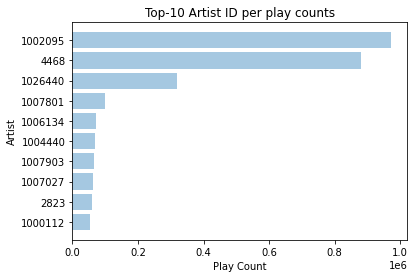

In [ ]:
top10ArtistsPC = newUserArtistDF.groupBy('artistID').sum('playCount').orderBy('sum(playCount)', ascending=0).take(10)
y_pos = list(range(len(top10ArtistsPC)))
pdf = pd.DataFrame(data=top10ArtistsPC)
plt.barh(y_pos, pdf[1][::-1], align='center', alpha=0.4)
plt.yticks(y_pos, pdf[0][::-1])
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top-10 Artist ID per play counts')
plt.show()

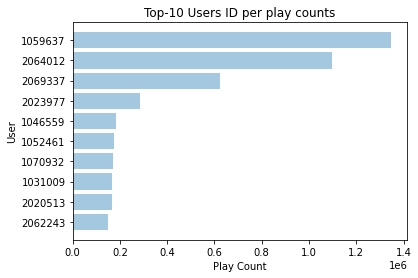

In [ ]:
top10UsersByPlayCount = newUserArtistDF.groupBy("userID").sum('playCount').orderBy('sum(playCount)', ascending=0).take(10)

y_pos = list(range(len(top10UsersByPlayCount)))
pdf = pd.DataFrame(data=top10UsersByPlayCount)

plt.barh(y_pos, pdf[1][::-1], align='center', alpha=0.4)
plt.yticks(y_pos, pdf[0][::-1])
plt.xlabel('Play Count') 
plt.ylabel('User')
plt.title('Top-10 Users ID per play counts')
plt.show()

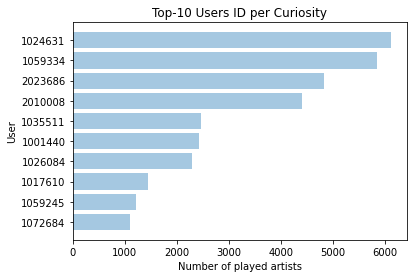

In [ ]:
top10UsersByCuriosity = (newUserArtistDF.dropDuplicates(['userID', 'artistID'])
                             .groupBy("userID")
                             .count()
                             .orderBy('count', ascending=0)
                             .take(10)
                         )

#print(top10UsersByCuriosity)
y_pos = range(len(top10UsersByCuriosity))

pdf = pd.DataFrame(data=top10UsersByCuriosity)

plt.barh(y_pos, pdf[1][::-1], align='center', alpha=0.4)
plt.yticks(y_pos, pdf[0][::-1])
plt.xlabel('Number of played artists')
plt.ylabel('User')
plt.title('Top-10 Users ID per Curiosity')
plt.show()

In [ ]:
import findspark
findspark.init()

from pyspark.mllib.recommendation import *
import random
from operator import *
from collections import defaultdict
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time

In [ ]:
from pyspark import SparkContext, SparkConf
spark = SparkContext.getOrCreate()
spark.stop()
spark = SparkContext('local','Recommender')

In [ ]:
artistData = spark.textFile('/content/drive/MyDrive/artist_data_small1.txt').map(lambda s:(int(s.split("\t")[0]),s.split("\t")[1]))
artistAlias = spark.textFile('/content/drive/MyDrive/artist_alias_small1.txt')
userArtistData = spark.textFile('/content/drive/MyDrive/user_artist_data_small1.txt')

In [ ]:
userArtistData = userArtistData.map(lambda s:(int(s.split(" ")[0]),int(s.split(" ")[1]),int(s.split(" ")[2])))

In [ ]:
artistAliasDictionary = {}
dataValue = artistAlias.map(lambda s:(int(s.split("\t")[0]),int(s.split("\t")[1])))
for temp in dataValue.collect():
    artistAliasDictionary[temp[0]] = temp[1]

In [ ]:
userArtistData = userArtistData.map(lambda x: (x[0], artistAliasDictionary[x[1]] if x[1] in artistAliasDictionary else x[1], x[2]))

In [ ]:
userSum = userArtistData.map(lambda x:(x[0],x[2]))
playCount1 = userSum.map(lambda x: (x[0],x[1])).reduceByKey(lambda a,b : a+b)
playCount2 = userSum.map(lambda x: (x[0],1)).reduceByKey(lambda a,b:a+b)
playSumAndCount = playCount1.leftOuterJoin(playCount2)

In [ ]:
playSumAndCount = playSumAndCount.map(lambda x: (x[0],x[1][0],int(x[1][0]/x[1][1])))

In [ ]:
TopThree = playSumAndCount.top(3,key=lambda x: x[1])
for i in TopThree:
    print('User '+str(i[0])+' has a total play count of '+str(i[1])+' and a mean play count of '+str(i[2])+'.')

User 1059637 has a total play count of 1348824 and a mean play count of 1878.
User 2064012 has a total play count of 1096854 and a mean play count of 9455.
User 2069337 has a total play count of 623778 and a mean play count of 1823.


In [ ]:
trainData, validationData, testData = userArtistData.randomSplit((0.4,0.4,0.2),seed=13)
trainData.cache()
validationData.cache()
testData.cache()

PythonRDD[21] at RDD at PythonRDD.scala:53

In [ ]:
print(trainData.take(3))
print(validationData.take(3))
print(testData.take(3))
print(trainData.count())
print(validationData.count())
print(testData.count())

[(1059637, 1000049, 1), (1059637, 1000056, 1), (1059637, 1000114, 2)]
[(1059637, 1000010, 238), (1059637, 1000062, 11), (1059637, 1000123, 2)]
[(1059637, 1000094, 1), (1059637, 1000112, 423), (1059637, 1000113, 5)]
19972
20027
9982


In [ ]:
def modelEval(model, dataset):
    
    # All artists in the 'userArtistData' dataset
    AllArtists = spark.parallelize(set(userArtistData.map(lambda x:x[1]).collect()))
    # Set of all users in the Validation/Testing dataset
    
    AllUsers = spark.parallelize(set(dataset.map(lambda x:x[0]).collect()))
    
    
    # Create a dictionary of (key, values) for Validation/Testing dataset
    
    ValidationAndTestingDictionary ={}
    for temp in AllUsers.collect():
        tempFilter = dataset.filter(lambda x:x[0] == temp).collect()
        for item in tempFilter:
            if temp in ValidationAndTestingDictionary:
                ValidationAndTestingDictionary[temp].append(item[1])
            else:
                ValidationAndTestingDictionary[temp] = [item[1]]
                    
    
    # Create a dictionary of (key, values) for training dataset
    
    TrainingDictionary = {}
    for temp in AllUsers.collect():
        tempFilter = trainData.filter(lambda x:x[0] == temp).collect()
        for item in tempFilter:
            if temp in TrainingDictionary:
                TrainingDictionary[temp].append(item[1])
            else:
                TrainingDictionary[temp] = [item[1]]
        
    
    # Calculate the prediction score for each user 
   
    PredictionScore = 0.00
    for temp in AllUsers.collect():
        ArtistPrediction =  AllArtists.map(lambda x:(temp,x))
        ModelPrediction = model.predictAll(ArtistPrediction)
        tempFilter = ModelPrediction.filter(lambda x :not x[1] in TrainingDictionary[x[0]])
        topPredictions = tempFilter.top(len(ValidationAndTestingDictionary[temp]),key=lambda x:x[2])
        l=[]
        for i in topPredictions:
            l.append(i[1])
        PredictionScore+=len(set(l).intersection(ValidationAndTestingDictionary[temp]))/len(ValidationAndTestingDictionary[temp])    

        
    # Print average score of the model for all users for the specified rank
    
    print("The model score for rank "+str(model.rank)+" is ~"+str(PredictionScore/len(ValidationAndTestingDictionary)))

In [ ]:
rankList = [2,10,20]
for rank in rankList:
     model = ALS.trainImplicit(trainData, rank , seed=345)
     modelEval(model,validationData) 

The model score for rank 2 is ~0.07478965804909071
The model score for rank 10 is ~0.09949125799664481
The model score for rank 20 is ~0.09020351262501673


In [ ]:
bestModel = ALS.trainImplicit(trainData, rank=10, seed=345)
modelEval(bestModel, testData)

The model score for rank 10 is ~0.06814203309788236


In [ ]:
TopFive = bestModel.recommendProducts(1059637,5)
for item in range(0,5):
    print("Artist "+str(item)+": "+artistData.filter(lambda x:x[0] == TopFive[item][1]).collect()[0][1])

Artist 0: Thrice
Artist 1: The Used
Artist 2: The Blood Brothers
Artist 3: System of a Down
Artist 4: Rage Against the Machine


time taken for the entire script

In [ ]:

print('The script takes %f seconds' %(t1-t0))

The script takes 1.059970 seconds


# **working on python code for music recommendation** 

importing the required libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from sklearn.metrics import accuracy_score
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

unzipping the dataset

In [ ]:
!unzip /content/drive/MyDrive/music_Recommendation.zip

Archive:  /content/drive/MyDrive/music_Recommendation.zip
replace user_friends.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: user_friends.dat        
  inflating: user_taggedartists.dat  
  inflating: user_taggedartists-timestamps.dat  
  inflating: artists.dat             
  inflating: readme.txt              
  inflating: tags.dat                
  inflating: user_artists.dat        


We’ll focus on user_artists.dat and artists.dat as they contain all data required to make recommendations for new music artists to a user. Instead of ratings, we’re going to use the play count by a user for each artist.

loading the dataset

In [ ]:
import numpy as np 
import pandas as pd
plays = pd.read_csv('/content/user_artists.dat', sep='\t')
artists = pd.read_csv(
  '/content/artists.dat',
  sep='\t',
  usecols=['id','name']
)

In [ ]:
plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [ ]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92834 entries, 0 to 92833
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   userID    92834 non-null  int64
 1   artistID  92834 non-null  int64
 2   weight    92834 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


In [ ]:
plays.describe()

,userID,artistID,weight
count,92834.000000,92834.000000,92834.00000
mean,1037.010481,3331.123145,745.24393
std,610.870436,4383.590502,3751.32208
min,2.000000,1.000000,1.00000
25%,502.000000,436.000000,107.00000
50%,1029.000000,1246.000000,260.00000
75%,1568.000000,4350.000000,614.00000
max,2100.000000,18745.000000,352698.00000


In [ ]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17632 non-null  int64 
 1   name    17632 non-null  object
dtypes: int64(1), object(1)
memory usage: 275.6+ KB


In [ ]:
artists.describe()

,id
count,17632.000000
mean,9156.636853
std,5392.515296
min,1.000000
25%,4501.750000
50%,9048.500000
75%,13769.250000
max,18745.000000


preprocessing

In [ ]:
ap = pd.merge(
  artists, plays,
  how="inner",
  left_on="id",
  right_on="artistID"
)
ap = ap.rename(columns={"weight": "playCount"})

In [ ]:
ap

,id,name,userID,artistID,playCount
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


We merge the artists and user plays and rename the weight column to playCount. Let’s rank the artists based on how much they were played by the users:

In [ ]:
artist_rank = ap.groupby(['name']) \
  .agg({'userID' : 'count', 'playCount' : 'sum'}) \
  .rename(columns={"userID" : 'totalUniqueUsers', "playCount" : "totalArtistPlays"}) \
  .sort_values(['totalArtistPlays'], ascending=False)
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

merge with previous results

In [ ]:
ap = ap.join(artist_rank, on="name", how="inner") \
  .sort_values(['playCount'], ascending=False)

In [ ]:
ap.head()

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148


VISUALISATION

In [ ]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12) 

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right')

    plt.xticks(rotation=90)
    plt.show()

In [ ]:
artist_rank.head()

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148


In [ ]:
ap.head()

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148


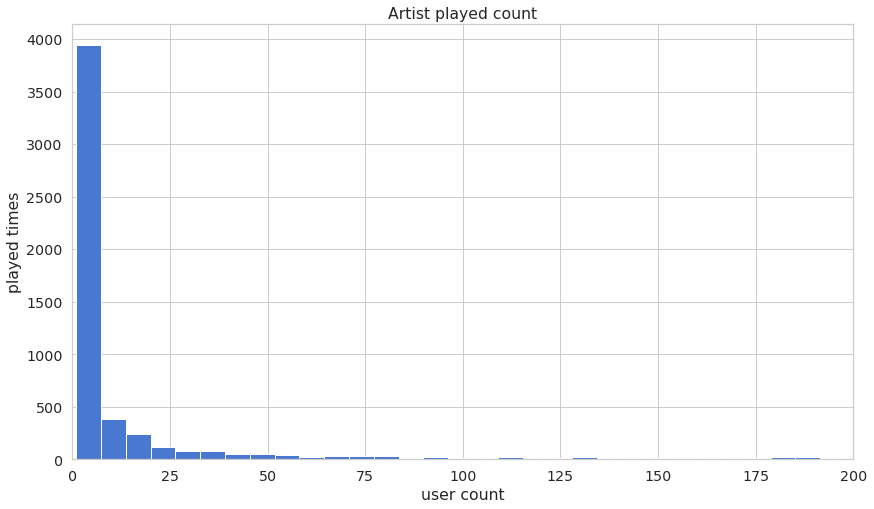

In [ ]:
ax = ap.playCount.value_counts().hist(bins=100)
ax.set_xlim((0, 200))
ax.set_title("Artist played count")
ax.set_xlabel("user count")
ax.set_ylabel("played times");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


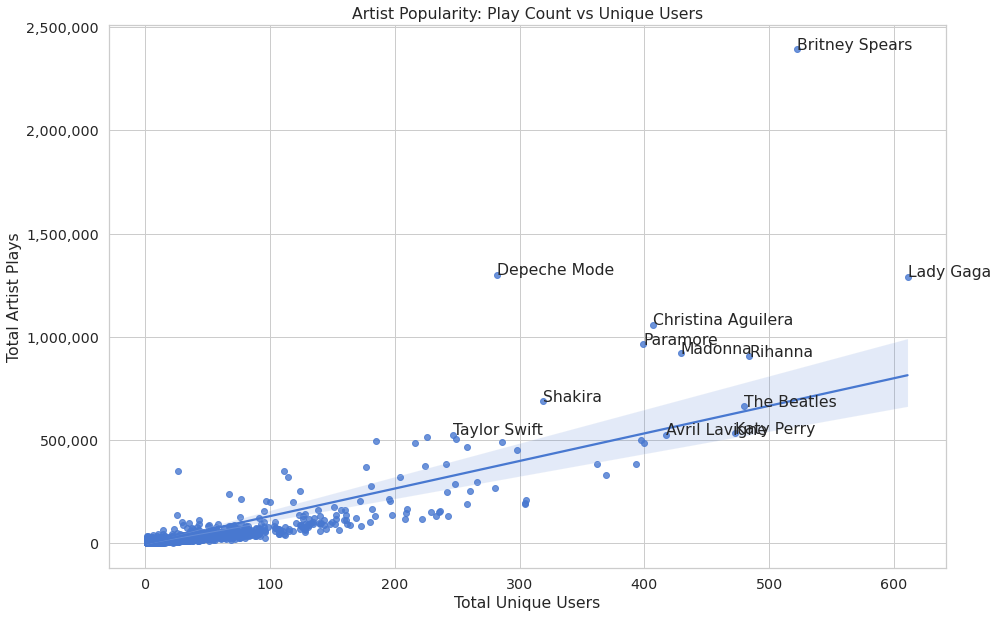

In [ ]:

top_artists = artist_rank.sort_values(['totalArtistPlays'],ascending=False).index[:12]

x = artist_rank.totalUniqueUsers
y = artist_rank.totalArtistPlays
labels = artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

MAKING RECOMMENDATIONS USING SGD

In [ ]:
pc = ap.playCount
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())

ap = ap.assign(playCountScaled=play_count_scaled)

In [ ]:
ratings_df = ap.pivot(
    index='userID', 
    columns='artistID', 
    values='playCountScaled'
)

In [ ]:
ratings = ratings_df.fillna(0).values

In [ ]:
train, val = train_test_split(ratings)

In [ ]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

def train_test_split(ratings):
    
    validation = np.zeros(ratings.shape)
    train = ratings.copy()
    
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(
                ratings[user, :].nonzero()[0], 
                size=DELETE_RATING_COUNT,
                replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [ ]:
train.shape

(1892, 17632)

MEASURING THE ERROR

In [ ]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

Let’s use SGD to train our recommender

In [ ]:
def fit(self, X_train, X_val):
  m, n = X_train.shape
  self.P = 3 * np.random.rand(self.n_latent_features, m)
  self.Q = 3 * np.random.rand(self.n_latent_features, n)
  self.train_error = []
  self.val_error = []
  users, items = X_train.nonzero()
  for epoch in range(self.n_epochs):
      for u, i in zip(users, items):
          error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
          self.P[:, u] += self.learning_rate * \
           (error * self.Q[:, i] - self.lmbda * self.P[:, u])
          self.Q[:, i] += self.learning_rate * \
           (error * self.P[:, u] - self.lmbda * self.Q[:, i])
      train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
      val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
      self.train_error.append(train_rmse)
      self.val_error.append(val_rmse)

PREDICTIONS:
We start by creating 2 matrixes for the latent features of the users and ratings. For each user, item pair, we calculate the error ( use a simple difference of the existing and predicted ratings). We then update PP and QQ using Gradient Descent.

After each training epoch, we calculate the training and validation errors and store their values to analyze later.

In [ ]:
def predictions(self, P, Q):
  return np.dot(P.T, Q)


In [ ]:
def predict(self, X_train, user_index):
  y_hat = self.predictions(self.P, self.Q)
  predictions_index = np.where(X_train[user_index, :] == 0)[0]
  return y_hat[user_index, predictions_index].flatten()

In [ ]:
recommender = Recommender().fit(train, val)

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]
rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]


create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [ ]:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,3117,Pete Yorn,0.104792
1,6403,The Highwaymen,0.103575
2,7547,Los Paranoias,0.103198
3,13111,Votchi,0.102901
4,13198,Raindancer,0.101285
5,13830,Phil Ochs,0.101205
6,15742,Nelstar*,0.100503
7,16190,Heroin,0.100498
8,17805,Huski,0.100484
9,18300,Ken Laszlo,0.100358
